<a href="https://colab.research.google.com/github/Andre647/Ciencia_de_Dados/blob/main/IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nomes

* André Monteiro Sanches Garcia -19.01230-6

* Arthur C Sarnadas – 19.00756-6

* Giovanni B Benuthe – 19.00043-0

* Guilherme Bernardelli Zeigler - 19.02453-3

#Imports


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Uploads

In [ ]:
# from google.colab import files

# uploaded = files.upload()

Saving multiTimeline.csv to multiTimeline.csv
Saving title_crew.tsv to title_crew.tsv
Saving title_ratings.tsv to title_ratings.tsv


#Datasets

In [16]:
t_basic = pd.read_csv('/content/title_basics.tsv', sep = '	',index_col = 0)
t_crew = pd.read_csv('/content/title_crew.tsv', sep = '	',index_col = 0)
t_ratings = pd.read_csv('/content/title_ratings.tsv', sep = '	',index_col = 0)
name_basics = pd.read_csv('/content/name_basics.tsv', sep = '	',index_col = 0)

In [17]:
t_basic.head()
#t_crew.head()
#t_ratings.head()
#name_basics.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


#Limpeza dataset t_basic

In [18]:
  # separa o genero em 3 colunas
t_basic[['genre1', 'genre2', 'genre3']] = t_basic['genres'].str.split(',', expand=True)  
  
  # colunas não usadas
t_basic = t_basic.drop(['originalTitle','genres','isAdult','endYear','runtimeMinutes'],axis = 1)  
  
  # apaga valores que não serão usados
cortados = t_basic['titleType'].isin(['short','tvShort','tvEpisode','tvMiniSeries','tvSpecial','video','videoGame','nan'])
t_basic = t_basic.drop(t_basic[cortados].index)

  # apaga valores nulos na coluna de genero
limpeza = t_basic['genre1'].isin(['\\N'])
t_basic = t_basic.drop(t_basic[limpeza].index)

 # adiciona as notas aos filmes
t_basic = pd.merge(t_basic, t_ratings, on='tconst', how='left')

 # transforma ano em numerico
t_basic['startYear'] = pd.to_numeric(t_basic['startYear'], errors='coerce')

  # Apaga filmes que possuem número de notas inferiores a 50 000
t_basic = t_basic.drop(t_basic[t_basic['numVotes'] < 50000].index)
t_basic = t_basic.dropna(subset=['numVotes'])


In [19]:
t_basic.head()

,titleType,primaryTitle,startYear,genre1,genre2,genre3,averageRating,numVotes
tconst,,,,,,,,
tt0010323,movie,The Cabinet of Dr. Caligari,1920.0,Horror,Mystery,Thriller,8.0,66632.0
tt0012349,movie,The Kid,1921.0,Comedy,Drama,Family,8.3,129325.0
tt0013442,movie,Nosferatu,1922.0,Fantasy,Horror,None,7.9,100776.0
tt0015324,movie,Sherlock Jr.,1924.0,Action,Comedy,Romance,8.2,52466.0
tt0015648,movie,Battleship Potemkin,1925.0,Drama,History,Thriller,7.9,59514.0


#Funções de filtro por um genero
(consideramos no minimo 50 000 avaliações)

##Manipulando os dados

In [20]:
 # passa pelas 3 colunas de genero para se certificar que nada foi omitido
def concatena_generos(df, genero_especifico):
    df1 = df[(df['genre1'] == genero_especifico)]
    df2 = df[(df['genre2'] == genero_especifico)]
    df3 = df[(df['genre3'] == genero_especifico)]
    df_genero = pd.concat([df1 ,df2 ,df3 ])
    return df_genero

 # pega todos os generos possiveis para controlar que o usuario digite algo que existe
def controla_generos():
  coluna1 = t_basic['genre1'].unique()
  coluna2 = t_basic['genre2'].unique()
  coluna3 = t_basic['genre3'].unique()
  genero = set(np.concatenate((coluna1, coluna2, coluna3)))
  return genero

 # pega os 10 melhores filmes do genero especificado
def top_genero(df, genero_especifico):
    df_genero = concatena_generos(df,genero_especifico)
    #ordena os melhores e separa os 10
    df_ordenado = df_genero.sort_values('averageRating', ascending=False)
    top_10 = df_ordenado.head(10)[['primaryTitle','averageRating']]
    return top_10

 # pega os 10 filmes mais populares do genero especificado
def popular_genero(df, genero_especifico):
    df_genero = concatena_generos(df,genero_especifico)
    #ordena os melhores e separa os 10
    df_ordenado = df_genero.sort_values('numVotes', ascending=False)
    top_10 = df_ordenado.head(10)[['primaryTitle','numVotes']]
    return top_10


##Exibindo os dados

In [21]:
  # mostra o grafico dos 10 melhores filmes
def exibicao_melhores(df):
    #caixa de texto
    texto_digitado = input('Digite qual genênero você deseja conhecer os melhores filmes: ').capitalize()
    genero = controla_generos()
  
    if texto_digitado not in genero:
      return 0
    else:
    # grafico
        top_10_filmes = top_genero(df,texto_digitado)
        grafico = sns.barplot(x = 'averageRating',y = 'primaryTitle', palette = 'mako',data = top_10_filmes)
    #plt.xlim(8, 10)
        return grafico

 # mostra o grafico dos 10 filmes mais populares
def exibicao_populares(df):

  #caixa de texto
    texto_digitado = input('Digite qual genênero você deseja conhecer os filmes mais populares: ').capitalize()
    genero = controla_generos()
  
    if texto_digitado not in genero:
      return 0
    else:
    # grafico
      populares_10_filmes = popular_genero(df,texto_digitado)
      grafico = sns.barplot(x = 'numVotes',y = 'primaryTitle', palette = 'mako',data = populares_10_filmes)
      #plt.xlim(8, 10)
      return grafico

#Quais são os filmes mais bem avaliados na plataforma?

In [22]:
 # separa os 10 filmes mais bem avaliados da plataforma 
t_basic_sorted = t_basic.sort_values(by='averageRating', ascending=False)
top_filmes = t_basic_sorted.head(10)

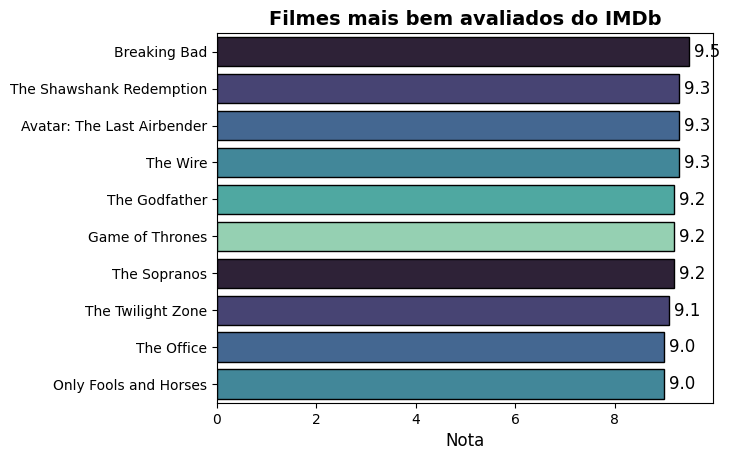

<Figure size 1000x600 with 0 Axes>

In [23]:
 # exibicao
palette = sns.color_palette('mako')
ax = sns.barplot(x='averageRating', y='primaryTitle', palette=palette, edgecolor='black',data=top_filmes)

plt.title('Filmes mais bem avaliados do IMDb', fontsize=14, fontweight='bold')

# Configuração dos rótulos para as barras
for i, v in enumerate(top_filmes['averageRating']):
    ax.text(v + 0.1, i, str(v), color='black', fontsize=12, va='center')


plt.xlabel('Nota', fontsize=12)
plt.ylabel('')
plt.figure(figsize=(10, 6))
plt.show()

#Quais são os filmes mais populares da plataforma?

In [24]:
 # separa os 10 filmes mais populares
t_basic_sorted = t_basic.sort_values(by='numVotes', ascending=False)
top_filmes = t_basic_sorted.head(10)

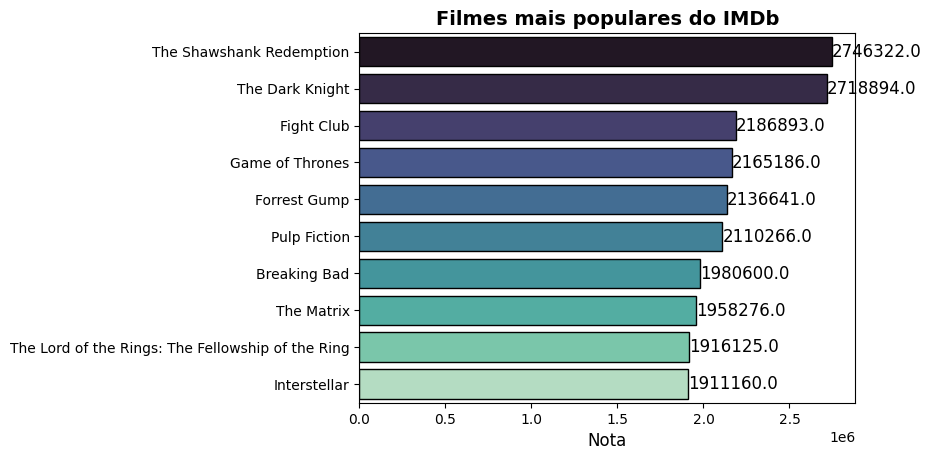

<Figure size 1000x600 with 0 Axes>

In [25]:
 # exibicao 
ax = sns.barplot(x = 'numVotes',y = 'primaryTitle', palette = 'mako',edgecolor = 'black',data = top_filmes)

plt.title('Filmes mais populares do IMDb', fontsize=14, fontweight='bold')

# Configuração dos rótulos para as barras
for i, v in enumerate(top_filmes['numVotes']):
    ax.text(v + 0.1, i, str(v), color='black', fontsize=12, va='center')


plt.xlabel('Nota', fontsize=12)
plt.ylabel('')
plt.figure(figsize=(10, 6))
plt.show()

#Quer descobrir a avaliação e popularidade para um determinado genero?

##Escolha entre estes generos apresentados:

Action, Adult, Adventure, Animation,

Biography, Comedy, Crime, Documentary,

Drama, Family, Fantasy, Film-Noir, Game-Show,

History, Horror, Music, Musical, Mystery,

News, Reality-TV, Romance, Sport,

Talk-Show, Thriller, War, Western,

Digite qual genênero você deseja conhecer os melhores filmes: horror


<Axes: xlabel='averageRating', ylabel='primaryTitle'>

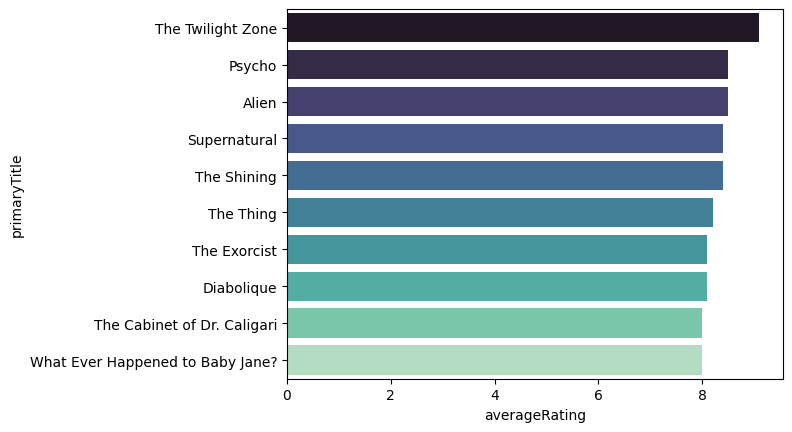

In [13]:
 # digite o genero que deseja analisar
exibicao_melhores(t_basic)

Digite qual genênero você deseja conhecer os filmes mais populares: horror


<Axes: xlabel='numVotes', ylabel='primaryTitle'>

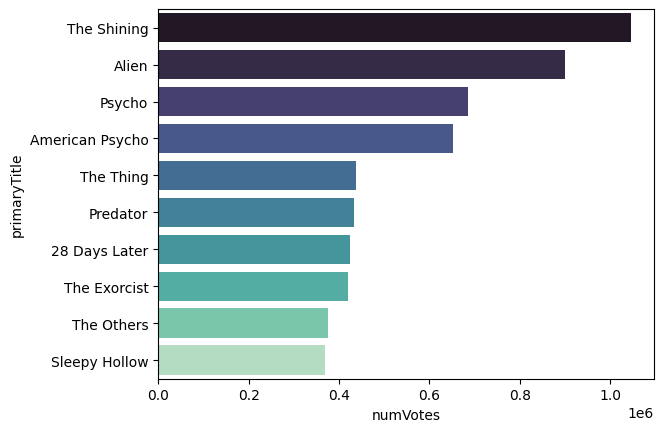

In [ ]:
 # digite o genero que deseja analisar
exibicao_populares(t_basic)

#Quais são os melhores diretores e atores/atrizes?

## Limpando name_basics

In [26]:
name_short.head()

,primaryName,birthYear,primaryProfession,knownForTitles,primaryProfession1,primaryProfession2,primaryProfession3
nconst,,,,,,,
nm0000001,Fred Astaire,1899,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",soundtrack,actor,miscellaneous
nm0000002,Lauren Bacall,1924,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0075213",actress,soundtrack,None
nm0000003,Brigitte Bardot,1934,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452",actress,soundtrack,music_department
nm0000004,John Belushi,1949,"actor,soundtrack,writer","tt0077975,tt0072562,tt0080455,tt0078723",actor,soundtrack,writer
nm0000005,Ingmar Bergman,1918,"writer,director,actor","tt0050976,tt0069467,tt0060827,tt0050986",writer,director,actor


In [27]:
 # removendo coluna que não sera utlizada e separando os dados que vieram na mesma coluna
name_short = name_basics.drop(['deathYear'], axis = 1)
name_short[['primaryProfession1', 'primaryProfession2', 'primaryProfession3']] = name_short['primaryProfession'].str.split(',', expand=True)

In [28]:
# Crie uma função lambda que verifica se uma linha contém "actor", "actress" ou "director"
contains_profs = lambda row: any([prof in ['actor', 'actress', 'director'] for prof in row.values])

# Aplique a função lambda a cada linha do DataFrame para criar uma série booleana
contains_profs_series = name_short[['primaryProfession1', 'primaryProfession2', 'primaryProfession3']].apply(contains_profs, axis=1)

# Indexe o DataFrame usando a série booleana para remover as linhas que não contêm nenhum desses valores
name_short = name_short[contains_profs_series]

In [29]:
# Crie uma lista de condições e valores para cada condição usando a função numpy.select()
conditions = [
    (name_short['primaryProfession1'].isin(['actor', 'actress', 'director'])),
    (name_short['primaryProfession2'].isin(['actor', 'actress', 'director']) & ~name_short['primaryProfession1'].isin(['director'])),
    (name_short['primaryProfession3'].isin(['actor', 'actress', 'director']) & ~name_short['primaryProfession1'].isin(['director']) & ~name_short['primaryProfession2'].isin(['director']))
]
values = [
    name_short['primaryProfession1'],
    name_short['primaryProfession2'],
    name_short['primaryProfession3']
]

# Use a função numpy.select() para criar a nova coluna "primaryProfession"
name_short['primaryProfession'] = np.select(conditions, values, default=np.nan)
name_short = name_short.drop(['primaryProfession1', 'primaryProfession2', 'primaryProfession3'], axis=1)


In [30]:
 # removendo valores vazios
name_short = name_short.dropna(subset=['knownForTitles'])
limpeza = name_short['knownForTitles'].isin(['\\N'])
name_short = name_short.drop(name_short[limpeza].index)

In [35]:
# separando os filmes da coluna knowForTitle
# a ideia da coluna knowForTitle é pegar os 4 filmes mais famosos do ator, entretanto
# algum dado apresenta uma linha suja com 5 virgulas e, portanto, 6 filmes.
# caso ao rodar o dataset esta linha apresentar um erro, rodar esta no lugar
#name_short[['knownForTitle1', 'knownForTitle2', 'knownForTitle3','knownForTitle4']] = name_short['knownForTitles'].str.split(',', expand=True)
name_short[['knownForTitle1', 'knownForTitle2', 'knownForTitle3','knownForTitle4','knownForTitle5']] = name_short['knownForTitles'].str.split(',', expand=True)
name_short = name_short.drop(['knownForTitle5'], axis=1)


In [36]:
 # passando por todos os filmes e analisando a nota de cada um
 # o intuito é armazenar apenas a maior nota de todos os 4 filmes
name_short = pd.merge(name_short,t_basic[['averageRating']], left_on='knownForTitle1',right_on='tconst' )
name_short = name_short.rename(columns = { 'averageRating' : 'averageRating1'})

name_short = pd.merge(name_short,t_basic[['averageRating']], left_on='knownForTitle2',right_on='tconst' )
name_short = name_short.rename(columns = { 'averageRating' : 'averageRating2'})

name_short = pd.merge(name_short,t_basic[['averageRating']], left_on='knownForTitle3',right_on='tconst' )
name_short = name_short.rename(columns = { 'averageRating' : 'averageRating3'})

name_short = pd.merge(name_short,t_basic[['averageRating']], left_on='knownForTitle4',right_on='tconst' )
name_short = name_short.rename(columns = { 'averageRating' : 'averageRating4'})


In [37]:
name_short['averageRating'] = name_short[['averageRating1', 'averageRating2', 'averageRating3', 'averageRating4']].apply(max, axis=1)
columns_to_drop = ['knownForTitle1', 'knownForTitle2', 'knownForTitle3', 'knownForTitle4',
                   'averageRating1', 'averageRating2', 'averageRating3', 'averageRating4']
name_short = name_short.drop(columns=columns_to_drop)
name_short.head()

,primaryName,birthYear,primaryProfession,knownForTitles,averageRating
0,J. David Jones,1936,actor,"tt0117998,tt0114898,tt0080455,tt0078788",8.4
1,Marlon Brando,1924,actor,"tt0070849,tt0068646,tt0047296,tt0078788",9.2
2,Kerry Rossall,1947,actor,"tt0096754,tt0120812,tt0120611,tt0078788",8.4
3,Jerry Ziesmer,1939,actor,"tt0181875,tt0116695,tt0095631,tt0078788",8.4
4,Francis Ford Coppola,1939,director,"tt0068646,tt0071360,tt0071562,tt0078788",9.2


##Quais são os atores, atrizes e diretores que estão nos filmes mais bem avaliados?

In [38]:
  # separa os 10 atores mais bem avaliados
top_atores = name_short[name_short['primaryProfession'] == 'actor'].sort_values('averageRating',ascending = False).head(10)

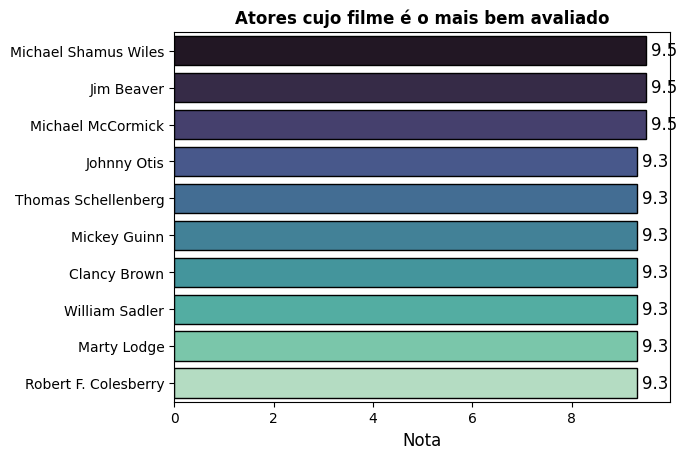

<Figure size 1000x600 with 0 Axes>

In [39]:
  # exibicao
ax = sns.barplot(x = 'averageRating',y = 'primaryName', palette = 'mako',edgecolor = 'black',data = top_atores)
plt.title('Atores cujo filme é o mais bem avaliado', fontsize=12, fontweight='bold')

# Configuração dos rótulos para as barras
for i, v in enumerate(top_atores['averageRating']):
    ax.text(v + 0.1, i, str(v), color='black', fontsize=12, va='center')


plt.xlabel('Nota', fontsize=12)
plt.ylabel('')
plt.figure(figsize=(10, 6))
plt.show()

In [40]:
  # separa as 10 atrizes mais bem avaliadas
top_atrizes = name_short[name_short['primaryProfession'] == 'actress'].sort_values('averageRating',ascending = False).head(10)


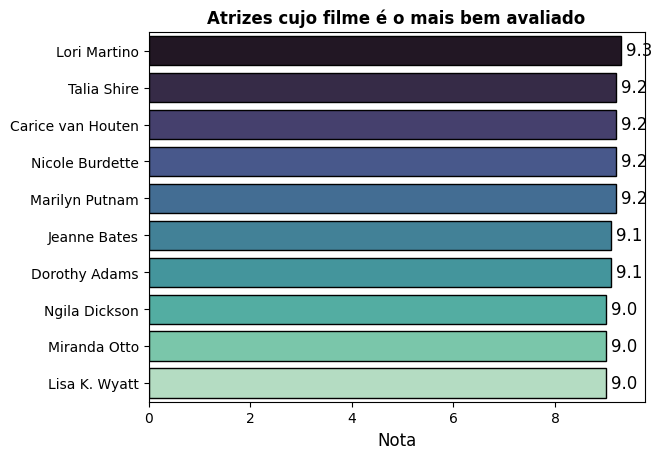

<Figure size 1000x600 with 0 Axes>

In [41]:
  # exibicao
ax = sns.barplot(x = 'averageRating',y = 'primaryName', palette = 'mako',edgecolor = 'black',data = top_atrizes)
plt.title('Atrizes cujo filme é o mais bem avaliado', fontsize=12, fontweight='bold')

# Configuração dos rótulos para as barras
for i, v in enumerate(top_atrizes['averageRating']):
    ax.text(v + 0.1, i, str(v), color='black', fontsize=12, va='center')


plt.xlabel('Nota', fontsize=12)
plt.ylabel('')
plt.figure(figsize=(10, 6))
plt.show()

In [42]:
  # separa os 10 diretores mais bem avaliados
top_diretores = name_short[name_short['primaryProfession'] == 'director'].sort_values('averageRating',ascending = False).head(10)

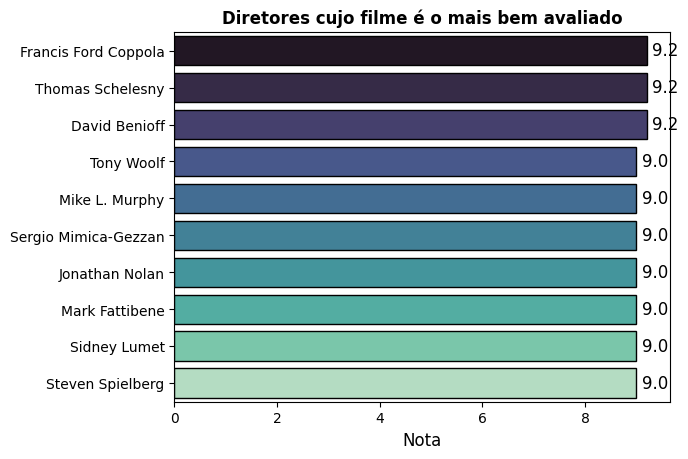

<Figure size 1000x600 with 0 Axes>

In [43]:
ax = sns.barplot(x = 'averageRating',y = 'primaryName', palette = 'mako',edgecolor = 'black',data = top_diretores)
plt.title('Diretores cujo filme é o mais bem avaliado', fontsize=12, fontweight='bold')

# Configuração dos rótulos para as barras
for i, v in enumerate(top_diretores['averageRating']):
    ax.text(v + 0.1, i, str(v), color='black', fontsize=12, va='center')


plt.xlabel('Nota', fontsize=12)
plt.ylabel('')
plt.figure(figsize=(10, 6))
plt.show()


#O sexo do ator interfere na nota do filme?

In [44]:
 # separa os grupos sendo eles , atores, atrizes e a junção dos dois
name_actors = name_short[name_short['primaryProfession'] != 'director']
actors = name_short[name_short['primaryProfession'] == 'actor']
actress = name_short[name_short['primaryProfession'] == 'actress']


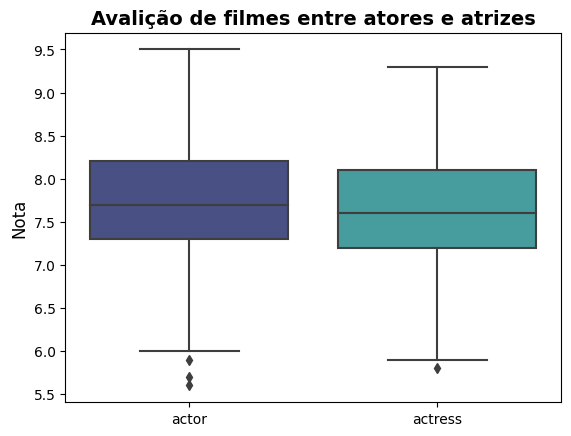

<Figure size 1000x600 with 0 Axes>

In [45]:
  # exibicao
sns.boxplot(data = name_actors, x = 'primaryProfession',y = 'averageRating',palette = 'mako')

plt.title('Avalição de filmes entre atores e atrizes', fontsize=14, fontweight='bold')
plt.ylabel('Nota',fontsize = 12)
plt.xlabel('')
plt.figure(figsize=(10, 6))
plt.show()

# As notas por sexo seguem uma distribuição normal? Existe um numero proximo de homens e mulheres no mercado cinematográfico?

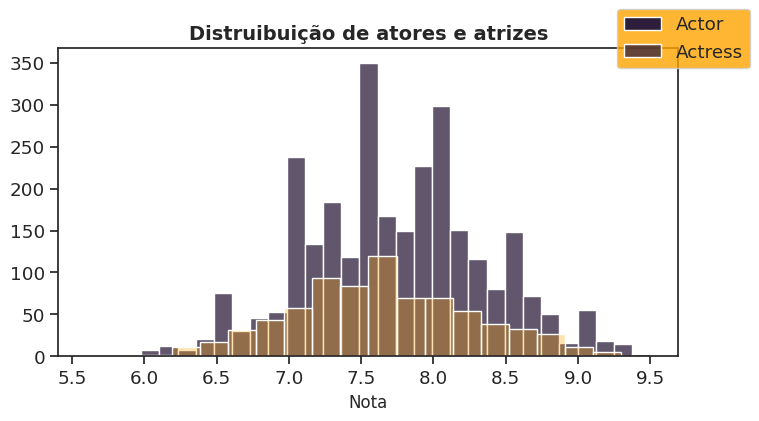

In [46]:
  # exibicao
sns.set(style="ticks", font_scale=1.2)
sns.set_palette("mako")


fig = plt.figure(figsize=(8,4))
sns.histplot(data = actors, x = 'averageRating')
sns.histplot(data = actress, x = 'averageRating',color='orange',alpha=0.3)
fig.legend(labels=['Actor', 'Actress'], facecolor='orange')

plt.title('Distruibuição de atores e atrizes', fontsize=14, fontweight='bold')
plt.xlabel('Nota',fontsize = 12)
plt.ylabel('')
plt.show()


#Testes de hipotese

##Assumindo que as notas seguem, aproximadamente, uma distribuição normal. Iremos verificar se a média de notas de *atores* e *atrizes* são maiores que 7,5.Temos as hipóteses de interesse que são:

##                     H0: μ = 7,5
##                     H1: μ > 7,5

In [47]:
from scipy import stats

In [48]:
  # valor a ser analisado, com alpha de 0.05
mu = 7.5
var = actors['averageRating'].std()
alpha = 0.05

In [49]:
ttest_Score, p_value = stats.ttest_1samp(actors['averageRating'], popmean=mu) 
print("t:", ttest_Score)
print("Valor-p:", round(p_value,5))

if(p_value <  alpha):
  print("Rejeita-se H0 ao n.s. de 5%.")
  print('Atores possuem uma média de nota de filme maior que 7,5')
else:
  print("Não se rejeita-se H0 ao n.s. de 5%.")

t: 20.74014216749722
Valor-p: 0.0
Rejeita-se H0 ao n.s. de 5%.
Atores possuem uma média de nota de filme maior que 7,5


In [50]:
ttest_Score, p_value = stats.ttest_1samp(actress['averageRating'], popmean=mu) 
print("t:", ttest_Score)
print("Valor-p:", round(p_value,5))

if(p_value <  alpha):
  print("Rejeita-se H0 ao n.s. de 5%.")
  print('Atrizes possuem uma média de nota de filme maior que 7,5')
else:
  print("Não se rejeita-se H0 ao n.s. de 5%.")

t: 6.197848279180538
Valor-p: 0.0
Rejeita-se H0 ao n.s. de 5%.
Atrizes possuem uma média de nota de filme maior que 7,5


## Atores possuem uma media de nota maior que atrizes?

## H0: μ1 = μ2
## H1: μ1 > μ2

In [51]:
ttest_Score, value_p = stats.ttest_ind(actors['averageRating'], actress['averageRating'], equal_var=True)


print('p-value: {:.10f}'.format(value_p))

if value_p < 0.05:
	print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
else:
  print('Não se rejeita a Hipótese Nula ao n.s. de 5%')
  print('Nao há diferença significativa de nota entre atores e atrizes')

p-value: 0.0001339723
Rejeita-se a Hipótese Nula ao n.s. de 5%


## Bartlett's test


In [52]:
  # teste para certificar que a variabilidade dos dois dados são semelhantes
from scipy.stats import bartlett
Bstat, value_p = bartlett(actors['averageRating'], actress['averageRating'])

if value_p < 0.05:
	print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
else:
    print('Não se rejeita a Hipótese Nula ao n.s. de 5%')
    print('Portando, as duas distribuições podem ser comparadas , uma vez que apresentam variabilidade semelhantes')

Não se rejeita a Hipótese Nula ao n.s. de 5%
Portando, as duas distribuições podem ser comparadas , uma vez que apresentam variabilidade semelhantes


#Quantidade de Filmes por ano e genero


In [53]:
 # consideramos apenas a coluna genre1, como o "genero principal"
 # removemos generos com poucos filmes para melhor visualização
grouped_data = t_basic.groupby(['genre1', 'startYear'])['primaryTitle'].count().reset_index()
generos_removidos = ['Biography','Adult', 'Documentary', 'Family', 'Film-Noir', 'Sci-Fi', 'Thriller', 'Western','Mystery','Fantasy','Crime','Romance']
grouped_data = grouped_data[~grouped_data['genre1'].isin(generos_removidos)]

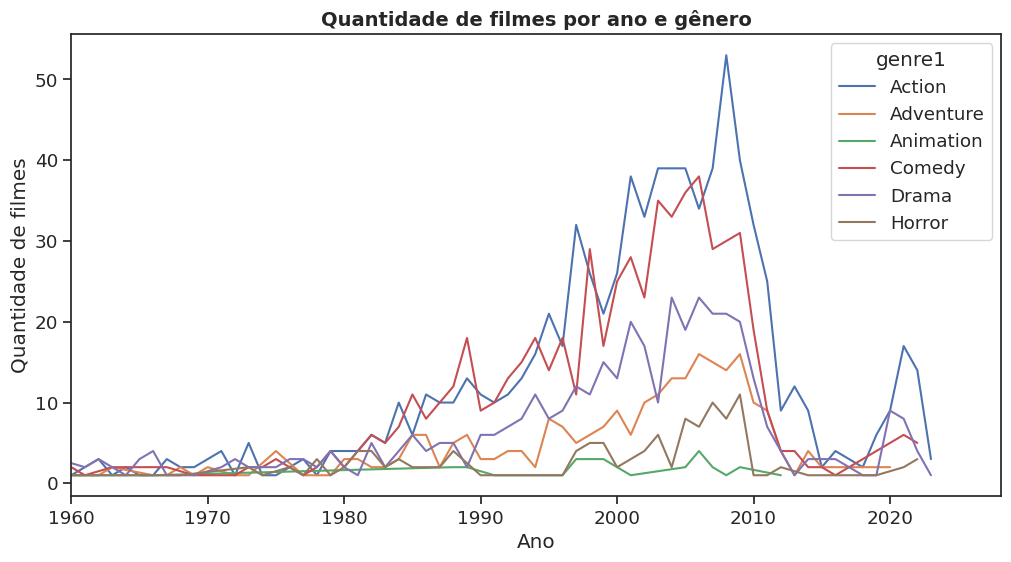

In [54]:
  #exibicao
sns.set(style="ticks", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(x='startYear', y='primaryTitle', hue='genre1', data=grouped_data)
plt.xlim(1960, None)

plt.title('Quantidade de filmes por ano e gênero',fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Quantidade de filmes')
plt.show()

#Qual efeito da guerra na Ucrania na produção de filmes de Guerra

In [56]:
 #dados do google trends
guerra = pd.read_csv('/content/multiTimeline.csv',header = 1)
guerra = guerra.rename(columns = {'Mês' : 'Mes','Guerra: (Mundo)' : 'Quantidade'})
guerra['Mes'] = pd.to_datetime(guerra['Mes'], format='%Y-%m')

In [57]:
  # separa os filmes cujo genero é guerra
guerra_imdb = t_basic.loc[
    (t_basic['genre1'] == 'War') | 
    (t_basic['genre2'] == 'War') | 
    (t_basic['genre3'] == 'War')]
    
guerra_imdb_groupby = guerra_imdb.groupby('startYear')[['primaryTitle']].count()
guerra_imdb_groupby.head()

,primaryTitle
startYear,
1930.0,1
1939.0,1
1940.0,1
1942.0,1
1946.0,1


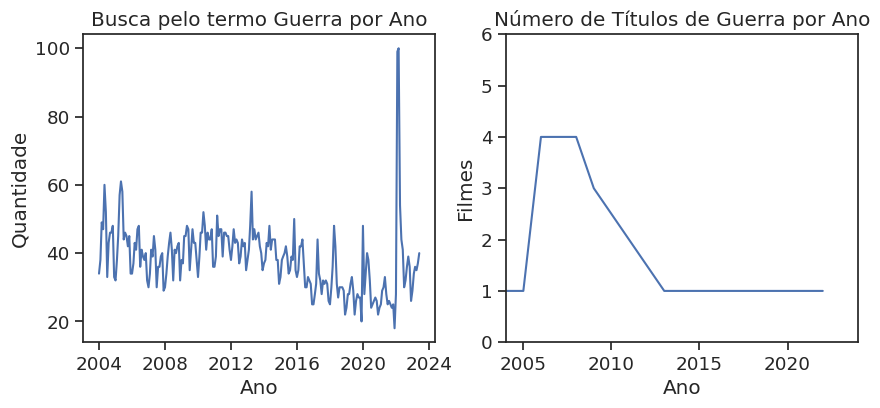

In [58]:
  # exibicao da comparação do google trends com o IMDB
import matplotlib.ticker as ticker

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_xlabel('Ano')
axs[0].set_title('Busca pelo termo Guerra por Ano')
sns.lineplot(data = guerra, x = 'Mes',y = 'Quantidade', ax = axs[0])

plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlim(2004, 2024)
plt.ylim(0, 6)


axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Filmes')
axs[1].set_title('Número de Títulos de Guerra por Ano')
sns.lineplot(data = guerra_imdb_groupby,x = 'startYear',y = 'primaryTitle',ax = axs[1])
plt.show()